In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#cargar archivos

#aprobadas
df_leyes = pd.read_csv("leyes_vis.csv")
df_partidos = pd.read_csv("partidos_vis.csv")
df_sexenios = pd.read_csv("sexenios_vis.csv")
df_trimestres = pd.read_csv("trimestres_vis.csv")

#desechadas

df_leyes_des = pd.read_csv("leyes_des_vis.csv")
df_partidos_des = pd.read_csv("partidos_des_vis.csv")
df_sexenios_des = pd.read_csv("sexenios_des_vis.csv")
df_trimestres_des = pd.read_csv("trimestres_des_vis.csv")

#combinaciones

df_leyes_EPN = pd.read_csv("leyes_EPN_vis.csv")
df_leyes_AMLO = pd.read_csv("leyes_AMLO_vis.csv")
df_trime_AMLO = pd.read_csv("trimestres_AMLO_vis.csv")
df_trime_EPN = pd.read_csv("trimestres_EPN_vis.csv")

In [171]:
df_leyes

,_id,count
0,"{""ley"":""ley del impuesto sobre la renta""}",111
1,"{""ley"":""ley general de educación""}",78
2,"{""ley"":""código penal federal""}",73
3,"{""ley"":""constitución política de los estados u...",52
4,"{""ley"":""""}",45
...,...,...
447,"{""ley"":""ley del impuesto sobre la renta y de l...",1
448,"{""ley"":""ley federal contra la delincuencia org...",1
449,"{""ley"":""ley general de vida silvestre""}",1
450,"{""ley"":""Ley General del Equilibrio Ecológico y...",1


In [172]:
#limpiar

df_leyes['_id'].replace(to_replace="^{\"ley\":\"", value=r"", regex=True, inplace=True)
df_leyes['_id'].replace(to_replace="\"}$", value=r"", regex=True, inplace=True)
df_leyes.rename(columns = {'_id': 'ley'}, inplace = True)

df_leyes

,ley,count
0,ley del impuesto sobre la renta,111
1,ley general de educación,78
2,código penal federal,73
3,constitución política de los estados unidos me...,52
4,,45
...,...,...
447,ley del impuesto sobre la renta y de la ley de...,1
448,ley federal contra la delincuencia organizada,1
449,ley general de vida silvestre,1
450,Ley General del Equilibrio Ecológico y la Prot...,1


In [173]:
#limpiar

df_leyes_des['_id'].replace(to_replace="^{\"ley\":\"", value=r"", regex=True, inplace=True)
df_leyes_des['_id'].replace(to_replace="\"}$", value=r"", regex=True, inplace=True)
df_leyes_des.rename(columns = {'_id': 'ley'}, inplace = True)

df_leyes_des

,ley,count
0,constitución política de los estados unidos me...,167
1,Constitución Política de los Estados Unidos Me...,48
2,ley del seguro social,10
3,ley general de salud,10
4,Ley General de Educación,10
...,...,...
109,código civil federal,1
110,ley del instituto del fondo nacional de la viv...,1
111,ley federal de los trabajadores al servicio de...,1
112,"código penal federal, relativo a delitos infor...",1


In [174]:
df_partidos

,partido,count
0,PAN,355
1,PRI,245
2,PRD,114
3,Mov_ciudadano,199
4,Part_verde,143
5,Part_trabajo,54
6,Morena,607


In [175]:
df_sexenios.rename(columns = {'_id': 'sexenio'}, inplace = True)
df_sexenios

,sexenio,count
0,EPN,144
1,AMLO,1418


In [176]:
df_sexenios_des.rename(columns = {'_id': 'sexenio'}, inplace = True)
df_sexenios_des

,sexenio,count
0,EPN,146
1,AMLO,273


In [177]:
df_trimestres.rename(columns = {'_id': 'año_trimestre'}, inplace = True)
df_trimestres

,año_trimestre,count
0,"{""year"":2019,""trimestre"":""trim 3""}",165
1,"{""year"":2020,""trimestre"":""trim 2""}",233
2,"{""year"":2021,""trimestre"":""trim 1""}",13
3,"{""year"":2020,""trimestre"":""trim 3""}",140
4,"{""year"":2019,""trimestre"":""trim 1""}",84
5,"{""year"":2021,""trimestre"":""trim 2""}",18
6,"{""year"":2020,""trimestre"":""trim 1""}",110
7,"{""year"":2021,""trimestre"":""trim 3""}",1
8,"{""year"":2018,""trimestre"":""trim 4""}",156
9,"{""year"":2020,""trimestre"":""trim 4""}",94


In [178]:
df_trimestres_des.rename(columns = {'_id': 'año_trimestre'}, inplace = True)

In [179]:
#limpiar las tablas de trimestre

#aprobadas
df_trimestres['año_trimestre'].replace(to_replace="^{\"year\":([0-9]{4},)\"trimestre\":\"trim ([0-9])\"}", value=r"\1\2", regex=True, inplace=True)
df_anio_trim = df_trimestres['año_trimestre'].str.split(',', expand=True)

df_anio_trim['count'] = df_trimestres['count']

#df_anio_trim tiene el trimestre y año separado
df_anio_trim.rename(columns = {0:'year',1:'trim'}, inplace = True)

#desechadas
df_trimestres_des['año_trimestre'].replace(to_replace="^{\"year\":([0-9]{4},)\"trimestre\":\"trim ([0-9])\"}", value=r"\1\2", regex=True, inplace=True)
df_anio_trim_des = df_trimestres_des['año_trimestre'].str.split(',', expand=True)

df_anio_trim_des['count'] = df_trimestres_des['count']

#df_anio_trim tiene el trimestre y año separado
df_anio_trim_des.rename(columns = {0:'year',1:'trim'}, inplace = True)


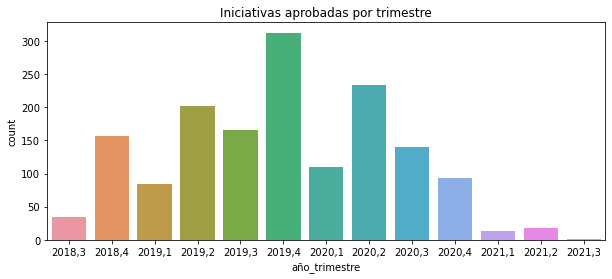

In [180]:
#ordenar los valores
df_trimestres.sort_values(by=['año_trimestre'], ascending=True, inplace=True)

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_trimestres, x='año_trimestre', y='count')
a.set_title("Iniciativas aprobadas por trimestre")
plt.show() # probar sin el plt.show()

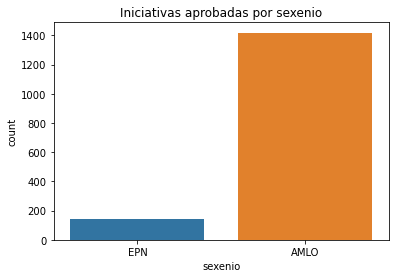

In [181]:
a = sns.barplot(data=df_sexenios, x='sexenio', y='count')
a.set_title("Iniciativas aprobadas por sexenio")
plt.show() # probar sin el plt.show()

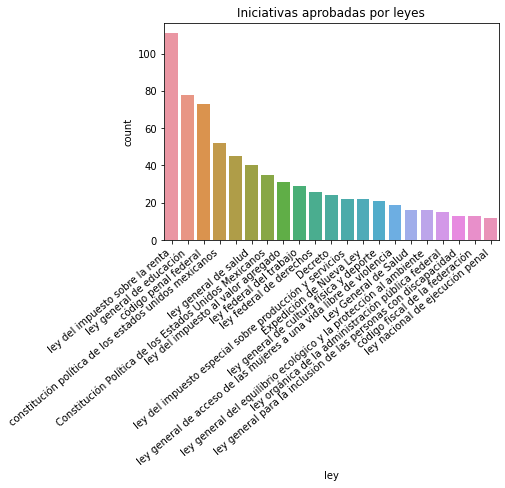

In [182]:
#esta tarda mucho mas porque hay muchas leyes
df_leyes_subset = df_leyes.where(df_leyes['count'] > 10)

a = sns.barplot(data=df_leyes_subset, x='ley', y='count')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
a.set_title("Iniciativas aprobadas por leyes")
plt.show() 

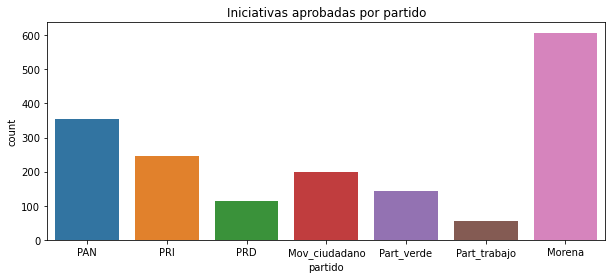

In [183]:
#van a haber repetidas, hay leyes que son de varios partidos

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_partidos, x='partido', y='count')
a.set_title("Iniciativas aprobadas por partido")
plt.show() 

## Desechadas

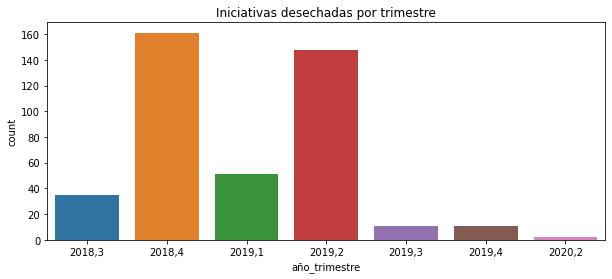

In [184]:
#ordenar los valores
df_trimestres_des.sort_values(by=['año_trimestre'], ascending=True, inplace=True)

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_trimestres_des, x='año_trimestre', y='count')
a.set_title("Iniciativas desechadas por trimestre")
plt.show() # probar sin el plt.show()

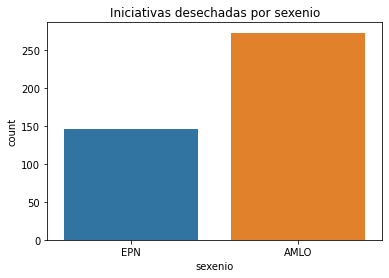

In [185]:
a = sns.barplot(data=df_sexenios_des, x='sexenio', y='count')
a.set_title("Iniciativas desechadas por sexenio")
plt.show() # probar sin el plt.show()

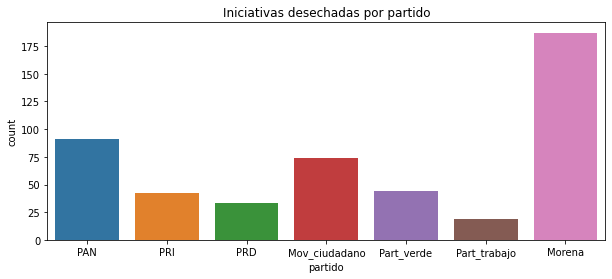

In [186]:
#van a haber repetidas, hay leyes que son de varios partidos

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_partidos_des, x='partido', y='count')
a.set_title("Iniciativas desechadas por partido")
plt.show() 

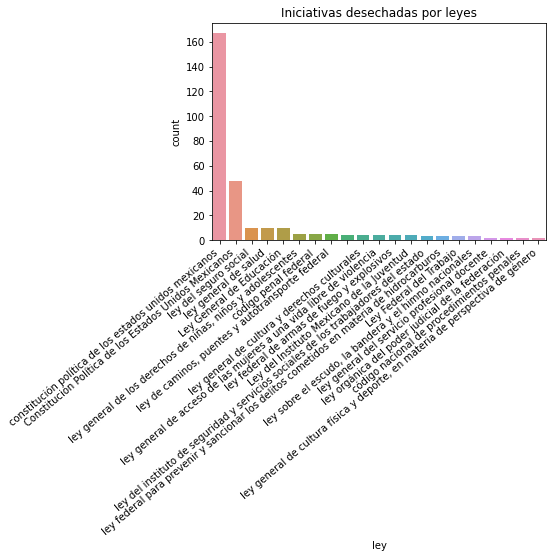

In [187]:
#esta tarda mucho mas porque hay muchas leyes
df_leyes_des_subset = df_leyes_des.where(df_leyes['count'] > 10)

a = sns.barplot(data=df_leyes_des_subset, x='ley', y='count')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
a.set_title("Iniciativas desechadas por leyes")
plt.show() 

In [188]:
#ojo que ahí dice constitución 2 veces

# Combinaciones

In [189]:
#df_leyes_EPN
#df_leyes_AMLO

#limpiar las df de leyes de cada sexenio
df_leyes_EPN['_id'].replace(to_replace="^{\"ley\":\"", value=r"", regex=True, inplace=True)
df_leyes_EPN['_id'].replace(to_replace="\"}$", value=r"", regex=True, inplace=True)
df_leyes_EPN.rename(columns = {'_id': 'ley'}, inplace = True)

df_leyes_AMLO['_id'].replace(to_replace="^{\"ley\":\"", value=r"", regex=True, inplace=True)
df_leyes_AMLO['_id'].replace(to_replace="\"}$", value=r"", regex=True, inplace=True)
df_leyes_AMLO.rename(columns = {'_id': 'ley'}, inplace = True)

#df_trime_AMLO
#df_trime_EPN
df_trime_AMLO.rename(columns = {'_id': 'año_trimestre'}, inplace = True)
df_trime_AMLO['año_trimestre'].replace(to_replace="^{\"year\":([0-9]{4},)\"trimestre\":\"trim ([0-9])\"}", value=r"\1\2", regex=True, inplace=True)

df_trime_EPN.rename(columns = {'_id': 'año_trimestre'}, inplace = True)
df_trime_EPN['año_trimestre'].replace(to_replace="^{\"year\":([0-9]{4},)\"trimestre\":\"trim ([0-9])\"}", value=r"\1\2", regex=True, inplace=True)


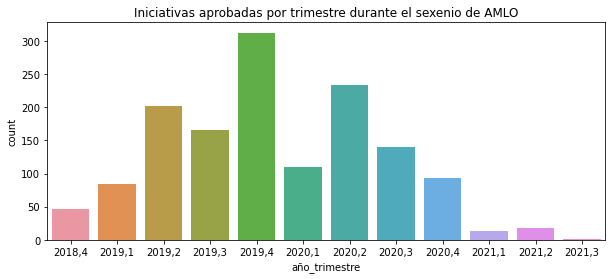

In [190]:
#ordenar los valores
df_trime_AMLO.sort_values(by=['año_trimestre'], ascending=True, inplace=True)

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_trime_AMLO, x='año_trimestre', y='count')
a.set_title("Iniciativas aprobadas por trimestre durante el sexenio de AMLO")
plt.show() # probar sin el plt.show()

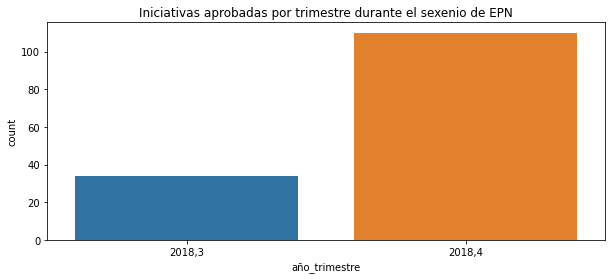

In [191]:
#ordenar los valores
df_trime_EPN.sort_values(by=['año_trimestre'], ascending=True, inplace=True)

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_trime_EPN, x='año_trimestre', y='count')
a.set_title("Iniciativas aprobadas por trimestre durante el sexenio de EPN")
plt.show() # probar sin el plt.show()

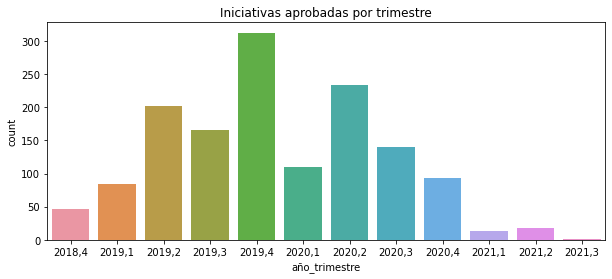

In [192]:
#ordenar los valores
df_trime_AMLO.sort_values(by=['año_trimestre'], ascending=True, inplace=True)

plt.figure(figsize=(10,4))
a = sns.barplot(data=df_trime_AMLO, x='año_trimestre', y='count')
a.set_title("Iniciativas aprobadas por trimestre")
plt.show() # probar sin el plt.show()

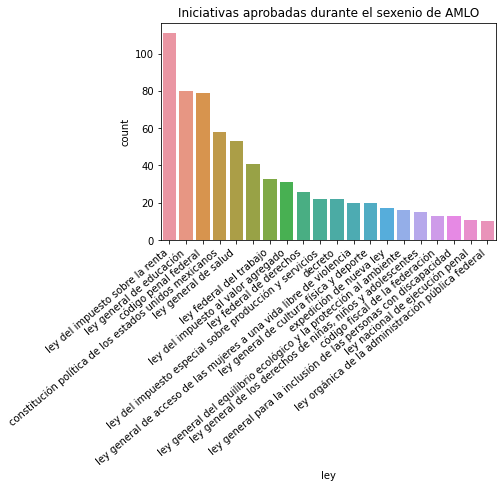

In [193]:
#df_leyes_des_subset = df_leyes_des.where(df_leyes['count'] > 5)

a = sns.barplot(data=df_leyes_AMLO, x='ley', y='count')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
a.set_title("Iniciativas aprobadas durante el sexenio de AMLO")
plt.show() 

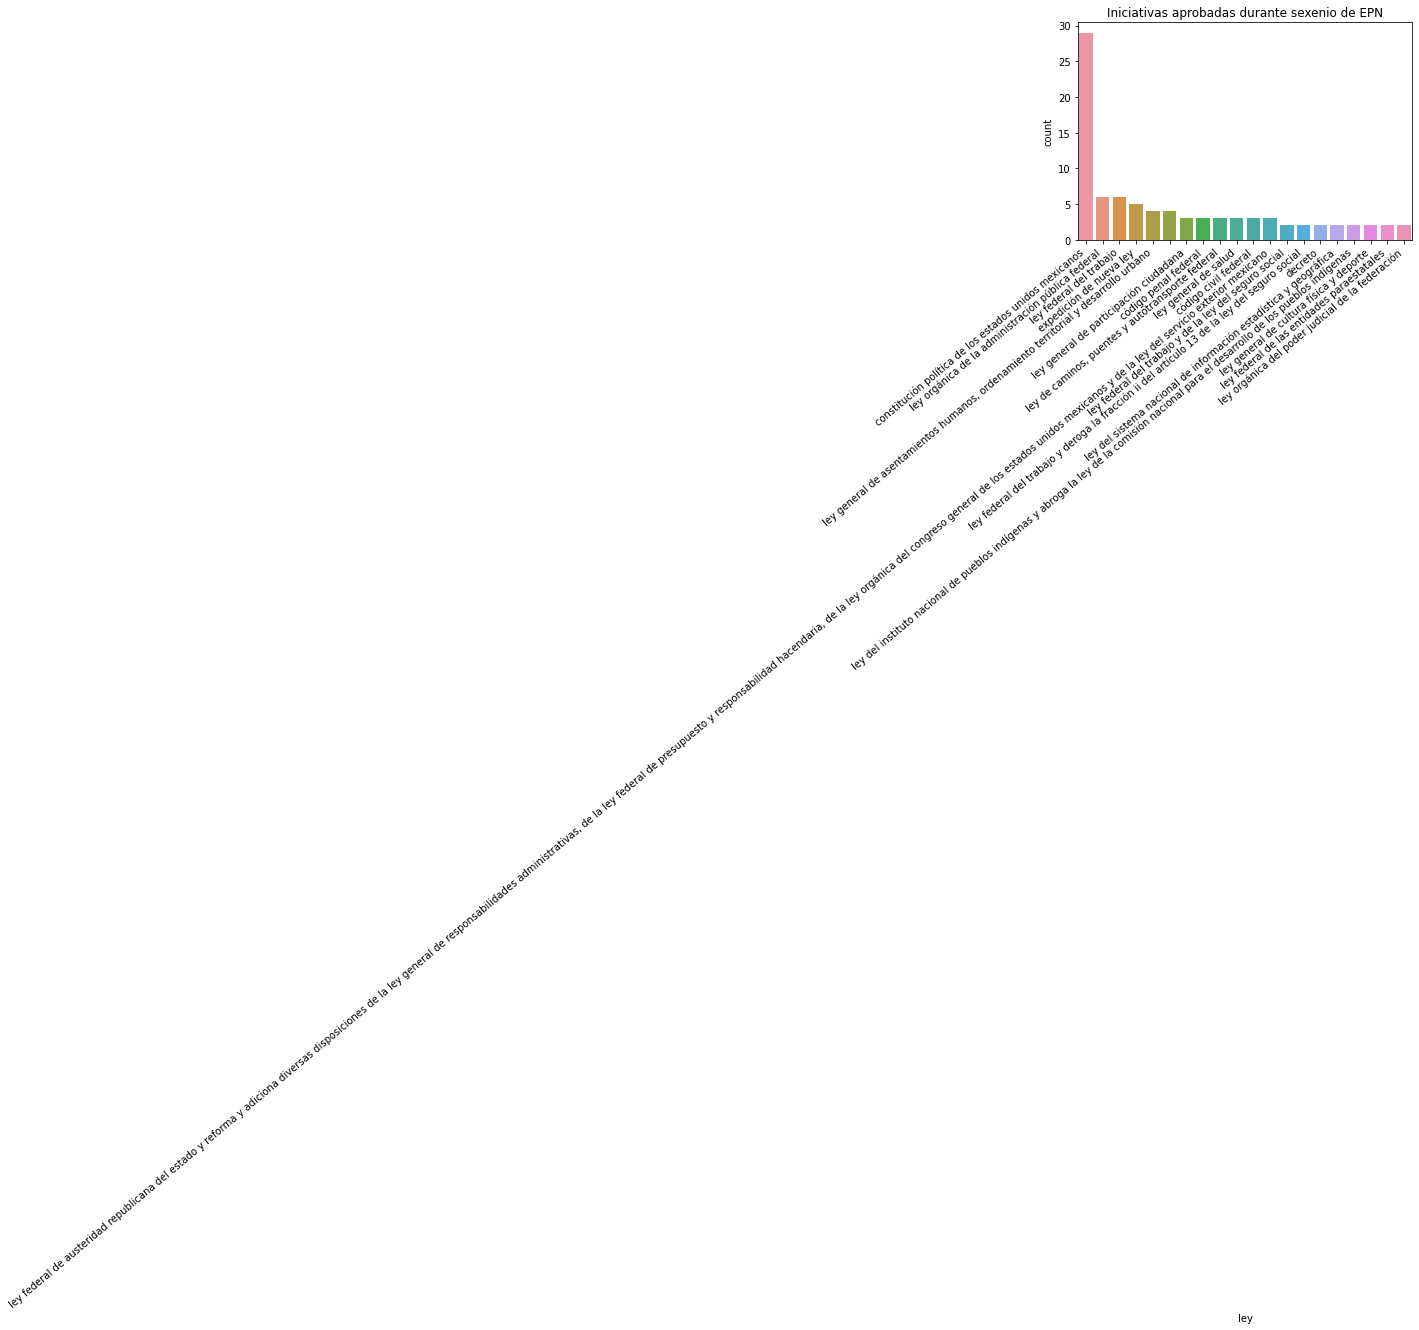

In [194]:
a = sns.barplot(data=df_leyes_EPN, x='ley', y='count')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
a.set_title("Iniciativas aprobadas durante sexenio de EPN")
plt.show() 